Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
import draw_shapes
import preprocessing
import hows_import
import h5py

# cuda on Nvidia, mps on Mac
device = torch.device("cuda:0" if torch.cuda.is_available() else "mps")

Load segmentation map from dataset (HOWS_CL_25)
The dataset should be at 2D_Shape_Completion/HOWS_CL_25

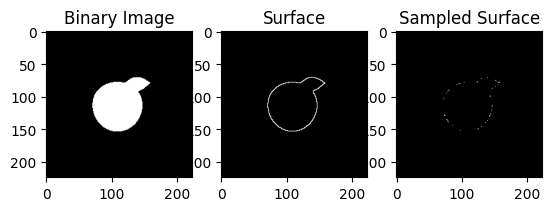

In [21]:
file = h5py.File("HOWS_CL_25/Images/apple/0/0a2af0e9d0d746169e712d2fddbd61ba/0.hdf5", "r")
segmap = file["segmap"]
np_segmap = np.array(segmap)
binary_image = preprocessing.segmap_to_binary(np_segmap)
surface = preprocessing.get_surface_pixels(binary_image)
sampled_surface = preprocessing.sample_pixels(surface, 50)
# visualize image, surface and sampled surface as images side by side
fig, ax = plt.subplots(1, 3)
ax[0].imshow(binary_image, cmap="gray")
ax[0].set_title("Binary Image")
ax[1].imshow(surface, cmap="gray")
ax[1].set_title("Surface")
ax[2].imshow(sampled_surface, cmap="gray")
ax[2].set_title("Sampled Surface")
#save binary_image to folder segmaps/apple/0/0a2af0e9d0d746169e712d2fddbd61ba/0.png
image_path = "segmaps/apple/0/0a2af0e9d0d746169e712d2fddbd61ba"
os.makedirs(image_path, exist_ok=True)
plt.imsave(image_path + "/0.png", binary_image, cmap="gray")






Would be good to extract the segmentation maps from all images as this is basically the only data we need, no RGB images or depth maps...
Next step: Train a modified U-Net model to predict a shape from a sparse set of sampled surface points.